---
# Time Series Explore Exercises
---

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

import prepare as p

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.
- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
- For both datasets you should choose a method of splitting your data and only explore the training split.

---
## Store Items Data
---

In [2]:
# read in data
df = p.get_clean_sales_data()

In [3]:
# take a look
df.head(1)

sale_amount  sale_id item_brand  item_id  \
sale_date                                              
2013-01-01         13.0        1   Riceland        1   

                                 item_name  item_price   item_upc12  \
sale_date                                                             
2013-01-01  Riceland American Jazmine Rice        0.84  35200264013   

             item_upc14           store_address   store_city  store_id  \
sale_date                                                                
2013-01-01  35200264013  12125 Alamo Ranch Pkwy  San Antonio         1   

           store_state  store_zipcode    month day_of_week  sales_total  
sale_date                                                                
2013-01-01          TX          78253  January     Tuesday        10.92

In [4]:
# make sure my index is being read in properly
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# I only want to take a look at average daily total sales for right now
s = df.sales_total.resample('D').mean()
s.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

In [6]:
s.index.max()

Timestamp('2017-12-31 00:00:00', freq='D')

In [7]:
s.index.min()

Timestamp('2013-01-01 00:00:00', freq='D')

In [8]:
# # I only want to take a look at average daily total sales for right now
# s = df.sales_total.resample('D').agg(['mean'])
# s.head()

---

### Plan
- Take a look at daily sales total averages for all stores
    - Recreate all plots
- Take a look at each store individually and see if things change?

### Split Data

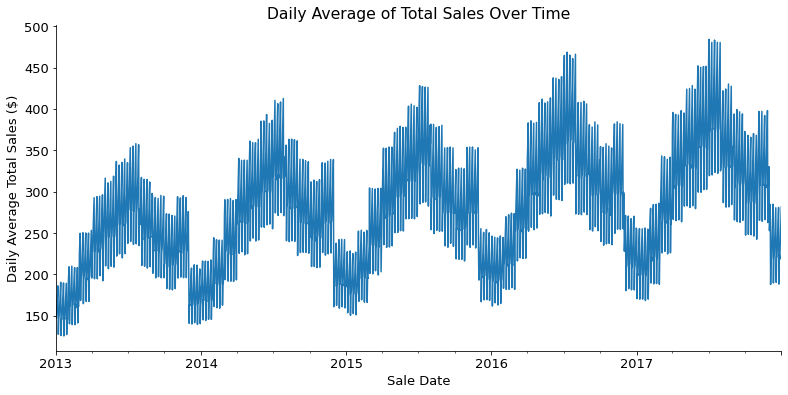

In [9]:
s.plot(title='Daily Average of Total Sales Over Time')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

In [10]:
# looks like I should take sales from 2017 as my test split
train = s.loc[:'2016']
test = s.loc['2017':]

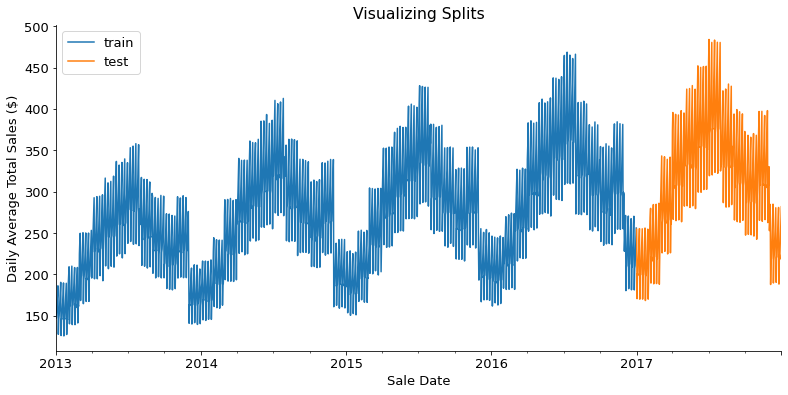

In [11]:
# take a look at plots to see if it worked
ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend()
plt.title('Visualizing Splits')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

In [12]:
# # going to try to replicate the % based approach
# train_size = .80
# test_size = .20

# train_end_index = round(s.shape[0] * train_size)
# train = s.iloc[:train_end_index]
# test = s.iloc[train_end_index:]

# ax = train.plot(label='train')
# test.plot(ax=ax, label='test')
# plt.legend();

In [13]:
# make a copy and reassign s to train
s = train.copy()

### Exploration

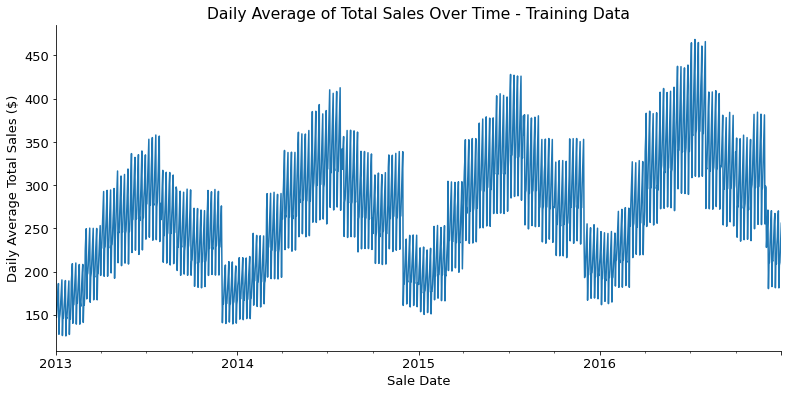

In [14]:
# plot training set
s.plot(title='Daily Average of Total Sales Over Time - Training Data')
plt.ylabel('Daily Average Total Sales ($)')
plt.xlabel('Sale Date');

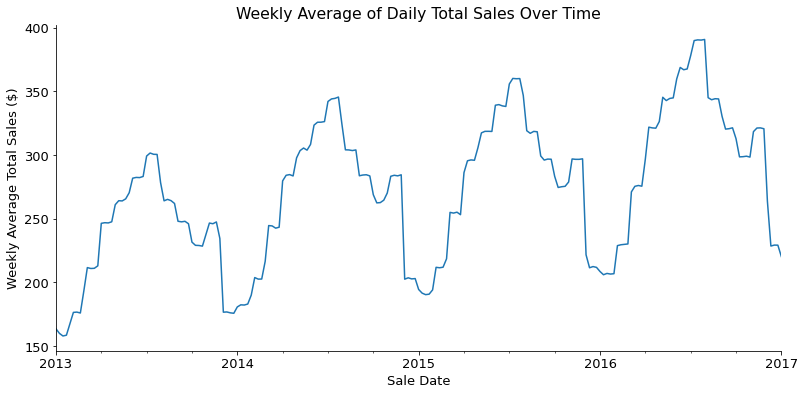

In [15]:
# resample to smooth plot
s.resample('W').mean().plot(title='Weekly Average of Daily Total Sales Over Time')
plt.ylabel('Weekly Average Total Sales ($)')
plt.xlabel('Sale Date');

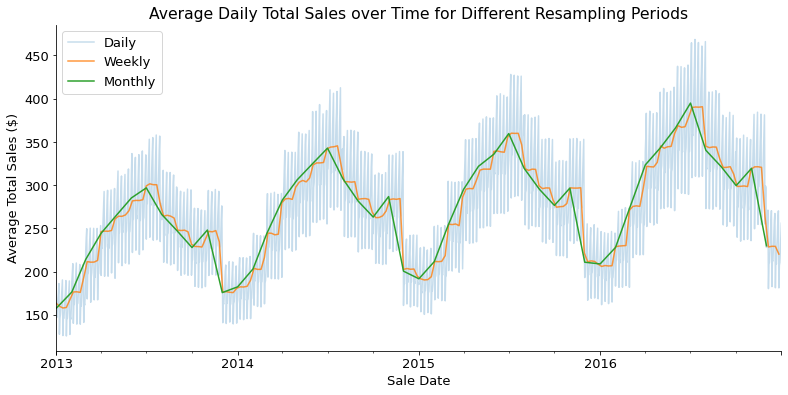

In [16]:
# combine multiple resampling periods on single viz
ax = s.resample('D').mean().plot(alpha=.25, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()
plt.title('Average Daily Total Sales over Time for Different Resampling Periods')
plt.ylabel('Average Total Sales ($)')
plt.xlabel('Sale Date');

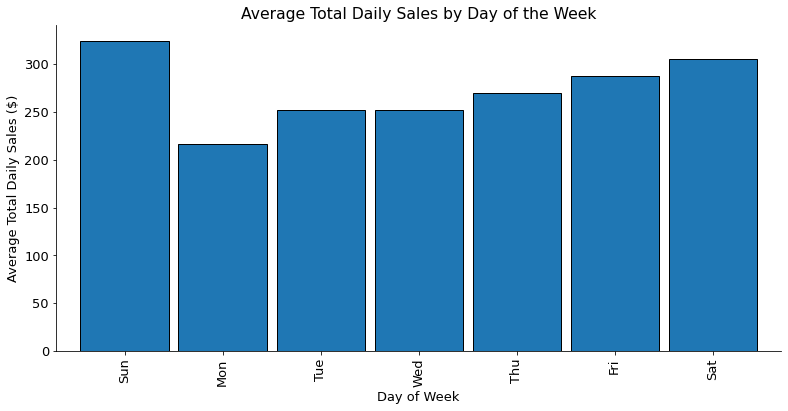

In [17]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[2:] for l in labels])
plt.title('Average Total Daily Sales by Day of the Week')
plt.ylabel('Average Total Daily Sales ($)')
plt.xlabel('Day of Week');

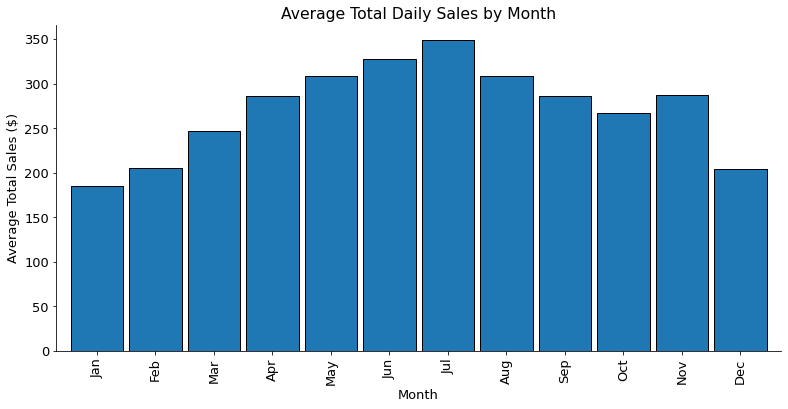

In [18]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[3:] for l in labels])
plt.title('Average Total Daily Sales by Month')
plt.ylabel('Average Total Sales ($)')
plt.xlabel('Month');

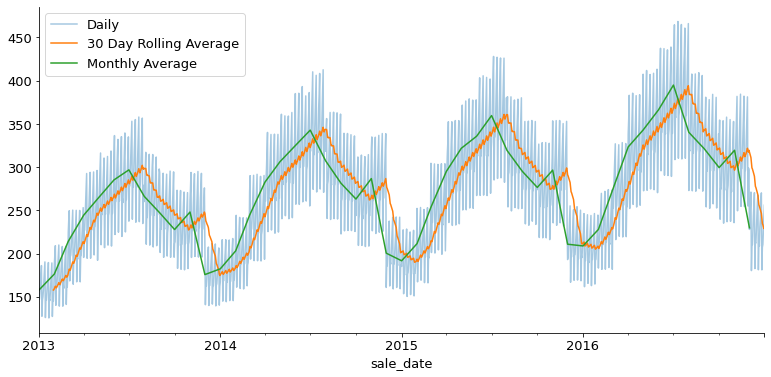

In [19]:
# moving average
ax = s.plot(label='Daily', alpha=.4)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 Day Rolling Average')
s.resample('M').mean().plot(ax=ax, label='Monthly Average')
ax.legend();

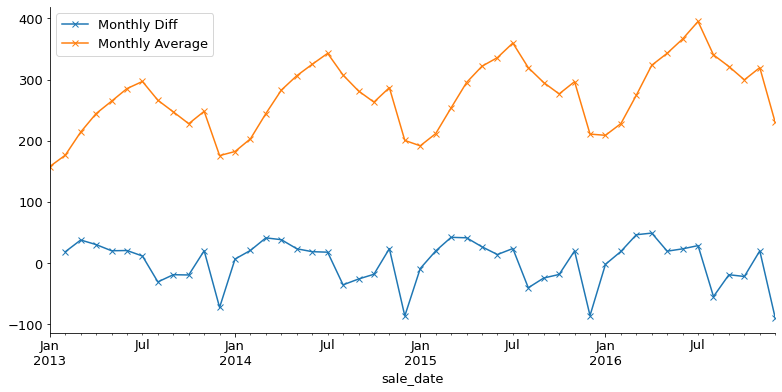

In [20]:
# monthly change in temperature
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend();

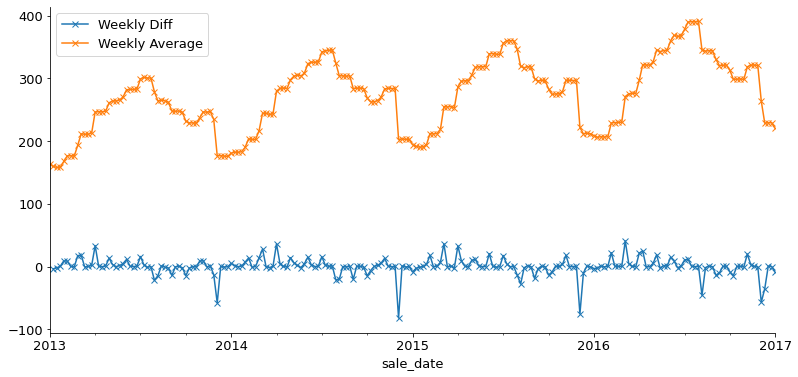

In [21]:
# weekly change in temperature
ax = s.resample('W').mean().diff().plot(label='Weekly Diff', marker='x')
s.resample('W').mean().plot(ax=ax, label='Weekly Average', marker='x')
plt.legend();

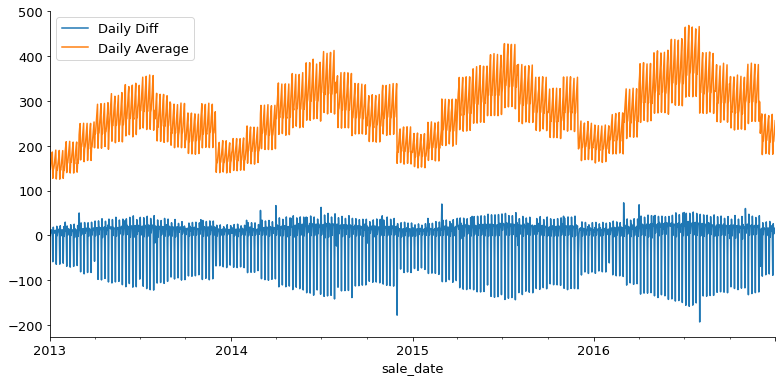

In [22]:
# daily change in temperature
ax = s.diff().plot(label='Daily Diff')
s.plot(ax=ax, label='Daily Average')
plt.legend();

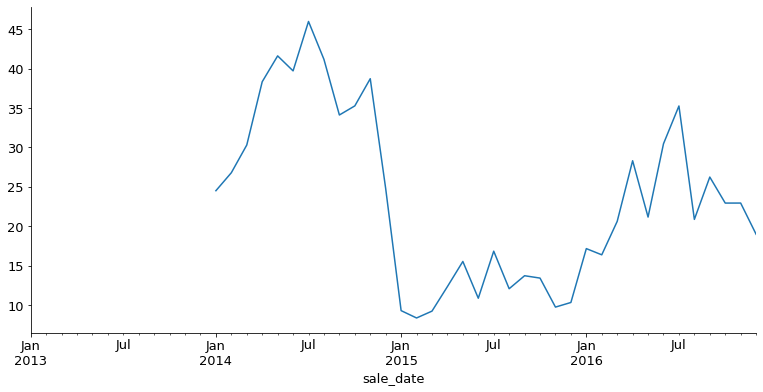

In [23]:
# difference in average daily sales for month and month from previous year
s.resample('M').mean().diff(12).plot();

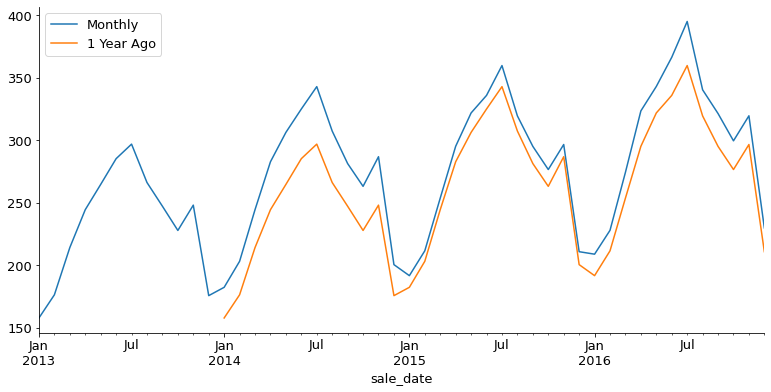

In [24]:
# use shift to overlay daily sales average for same month previous year
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend();

#### Seasonality

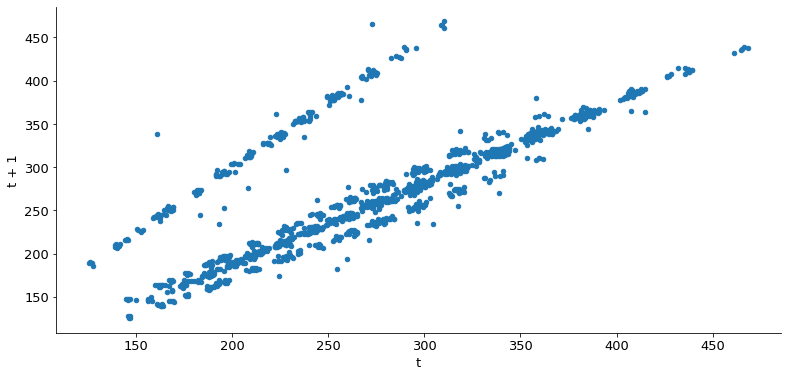

In [25]:
# lag plot

# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t');

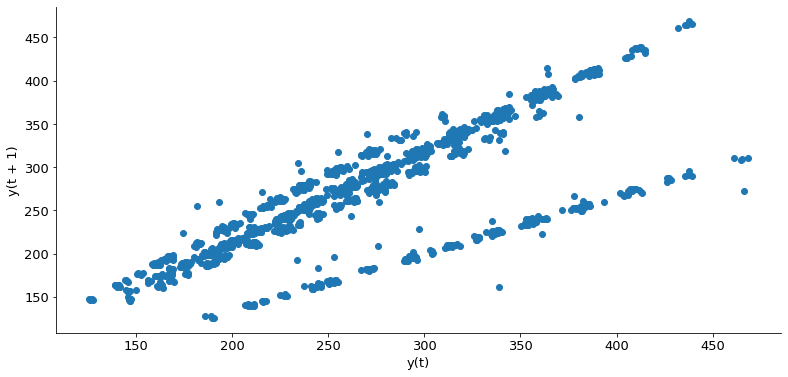

In [26]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

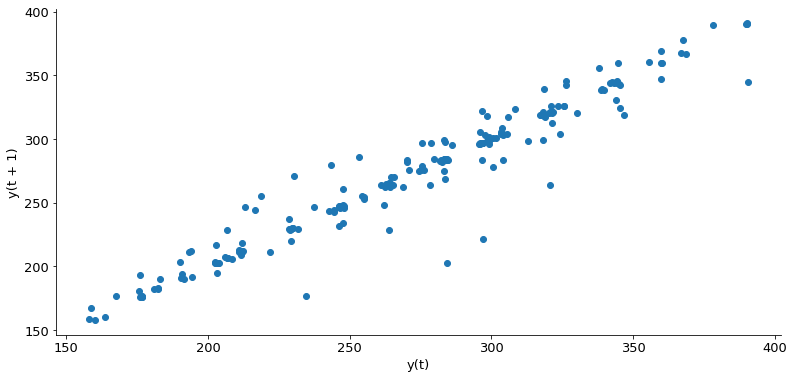

In [27]:
pd.plotting.lag_plot(s.resample('W').mean(), 1);

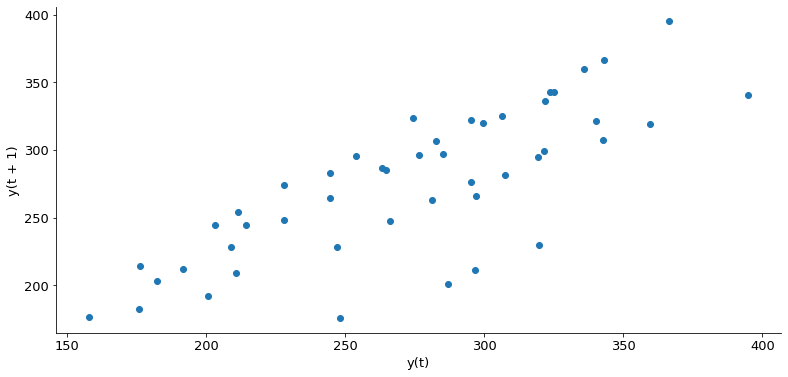

In [28]:
pd.plotting.lag_plot(s.resample('M').mean(), 1);

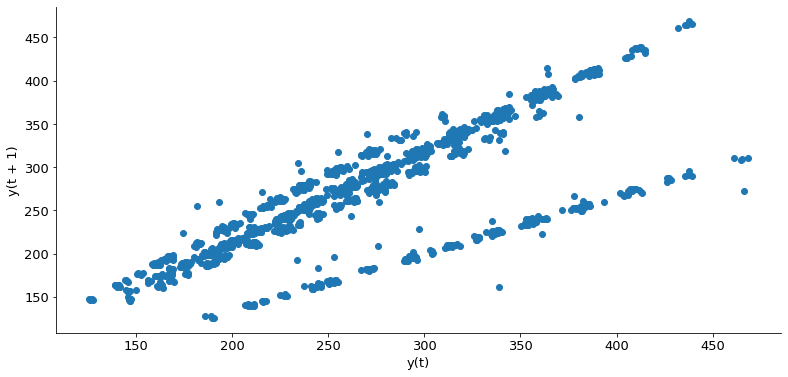

In [29]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

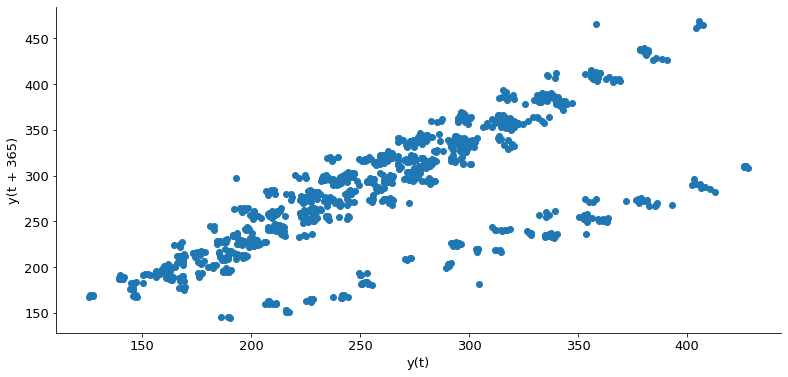

In [30]:
pd.plotting.lag_plot(s, 365);

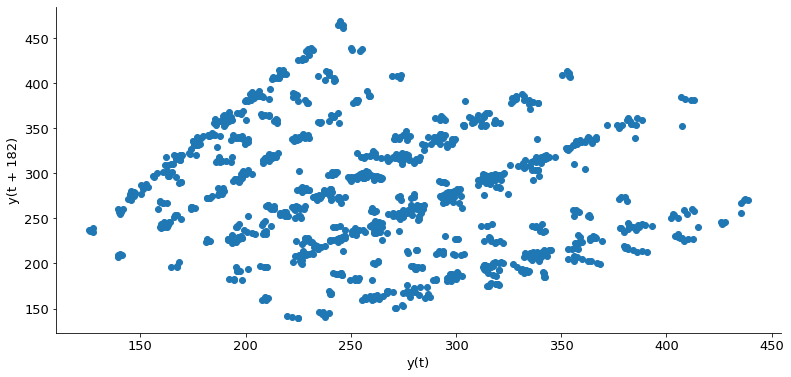

In [31]:
pd.plotting.lag_plot(s, round(365/2));

In [32]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [33]:
autocorrelation(s, 1)

0.7490549907739905

In [34]:
autocorrelation(s.resample('W').mean(), 1)

0.9667062249619762

In [35]:
autocorrelation(s.resample('M').mean(), 1)

0.788821859803136

In [36]:
autocorr = pd.Series({lag: autocorrelation(s, lag) for lag in range(1, 365)})

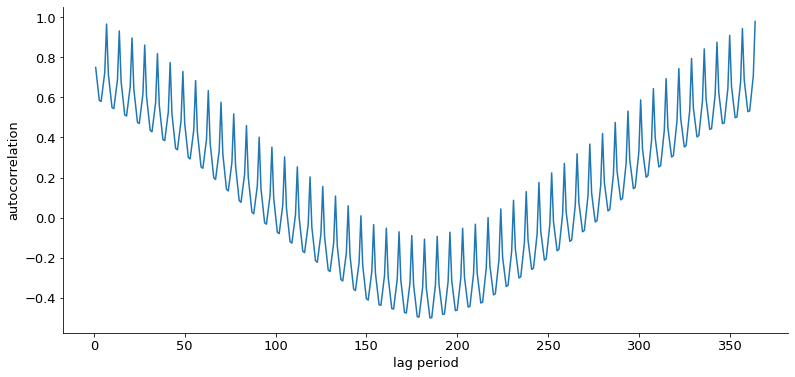

In [37]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation');

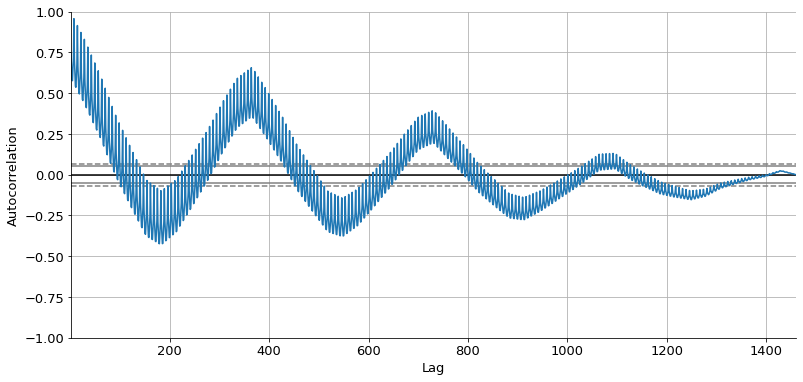

In [38]:
pd.plotting.autocorrelation_plot(s);

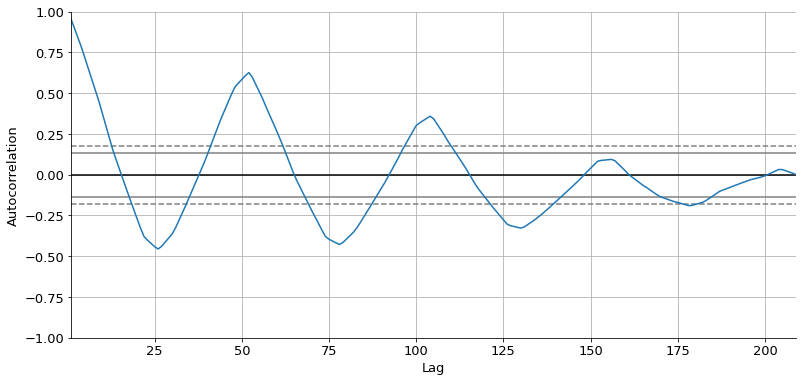

In [39]:
pd.plotting.autocorrelation_plot(s.resample('W').mean());

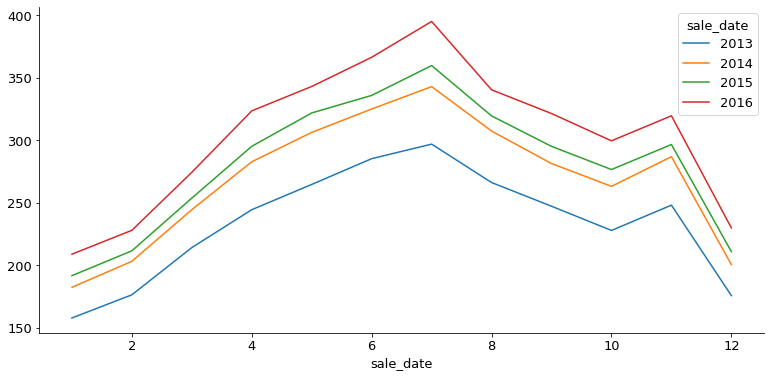

In [40]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot();

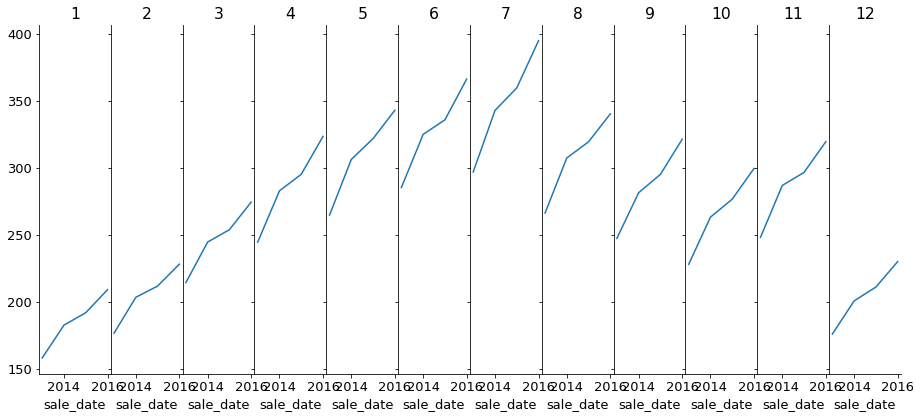

In [41]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

#### Seasonal Decomposition

In [42]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s.resample('W').mean(), model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

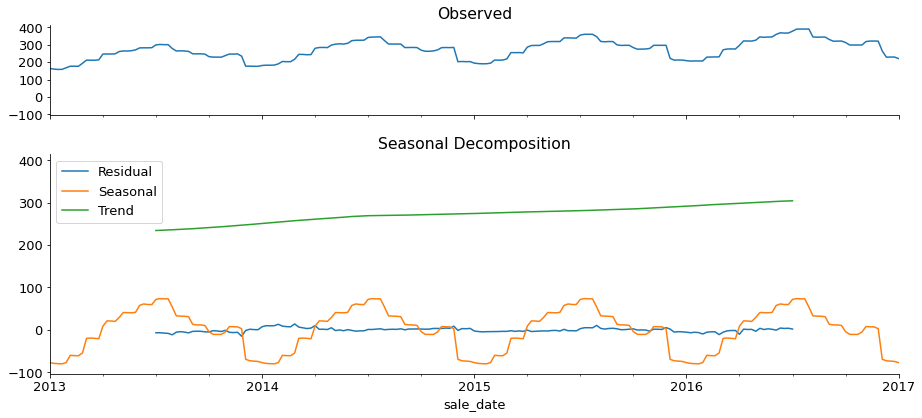

In [43]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();

## OPS Data

In [44]:
df = p.get_clean_power_data()

In [45]:
df.head()

Consumption  Wind  Solar  Wind+Solar    month  year
Date                                                           
2006-01-01     1069.184   0.0    0.0         0.0  January  2006
2006-01-02     1380.521   0.0    0.0         0.0  January  2006
2006-01-03     1442.533   0.0    0.0         0.0  January  2006
2006-01-04     1457.217   0.0    0.0         0.0  January  2006
2006-01-05     1477.131   0.0    0.0         0.0  January  2006

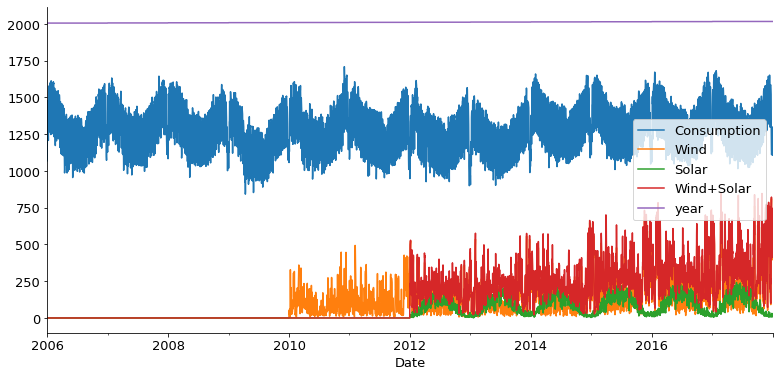

In [46]:
df.plot();

### Plan
- Take a look at daily comsumption for total, wind, and solar
    - Recreate all plots

### Split Data

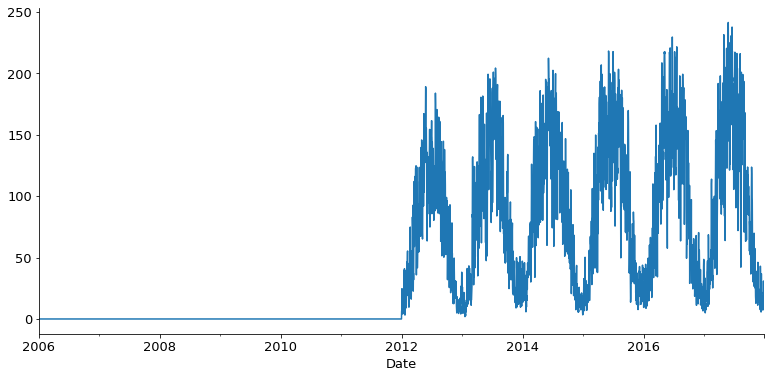

In [47]:
df.Solar.plot();

In [48]:
# eliminate rows with no data
s = df.Solar[df.Solar != 0]

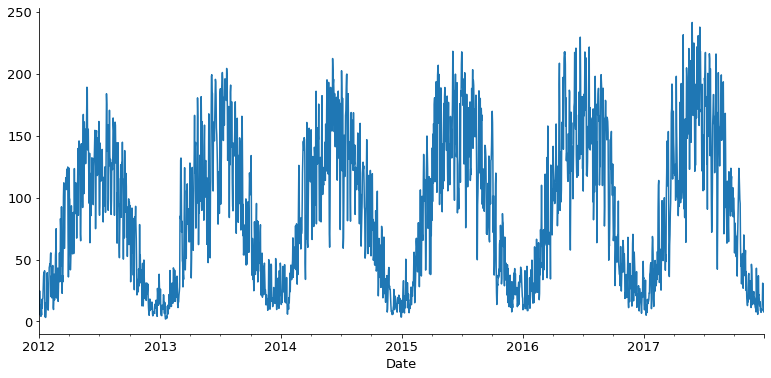

In [49]:
s.plot();

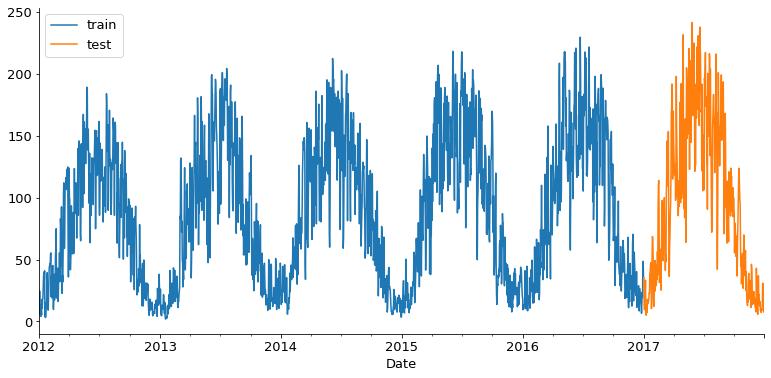

In [50]:
# and use 2017 as test split
train = s.loc[:'2016']
test = s.loc['2017']

ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend();

In [51]:
# reassign train to s
s = train.copy()

### Exploration

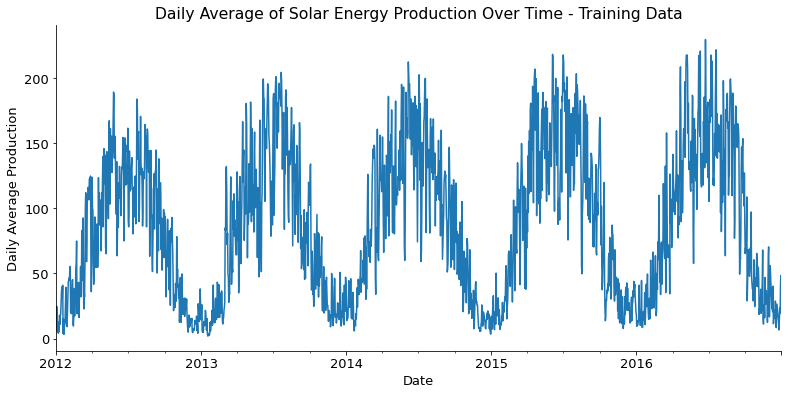

In [52]:
# plot training set
s.plot(title='Daily Average of Solar Energy Production Over Time - Training Data')
plt.ylabel('Daily Average Production')
plt.xlabel('Date');

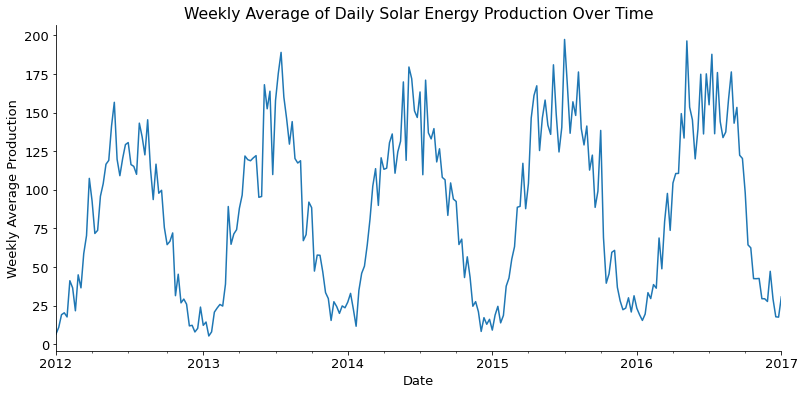

In [53]:
# resample to smooth plot
s.resample('W').mean().plot(title='Weekly Average of Daily Solar Energy Production Over Time')
plt.ylabel('Weekly Average Production')
plt.xlabel('Date');

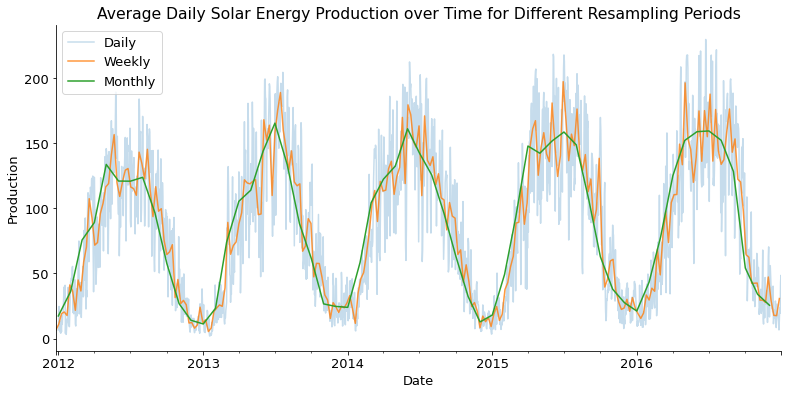

In [54]:
# combine multiple resampling periods on single viz
ax = s.resample('D').mean().plot(alpha=.25, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()
plt.title('Average Daily Solar Energy Production over Time for Different Resampling Periods')
plt.ylabel('Production')
plt.xlabel('Date');

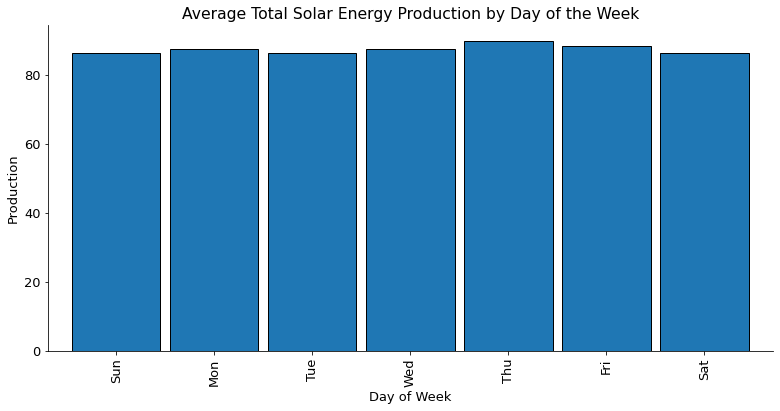

In [55]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[2:] for l in labels])
plt.title('Average Total Solar Energy Production by Day of the Week')
plt.ylabel('Production')
plt.xlabel('Day of Week');

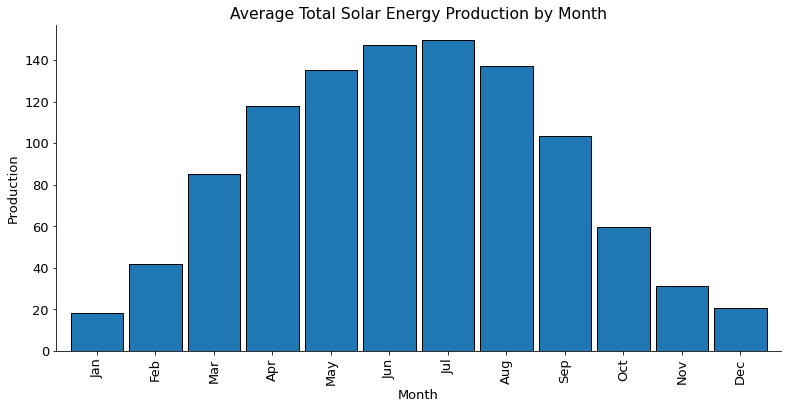

In [56]:
# take a look at sales on each day of the week
ax = s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[3:] for l in labels])
plt.title('Average Total Solar Energy Production by Month')
plt.ylabel('Production')
plt.xlabel('Month');

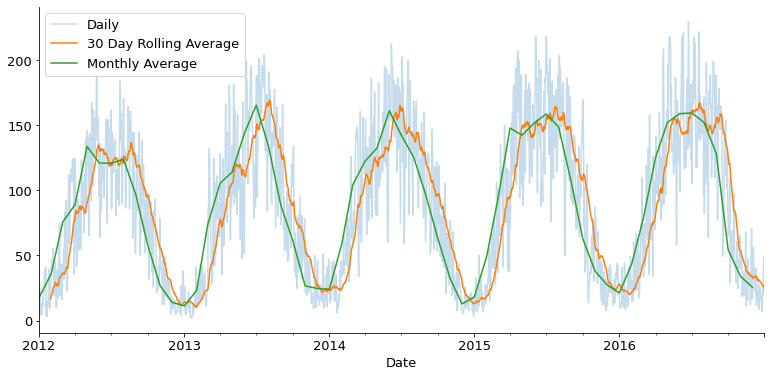

In [57]:
# moving average
ax = s.plot(label='Daily', alpha=.25)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 Day Rolling Average')
s.resample('M').mean().plot(ax=ax, label='Monthly Average')
ax.legend();

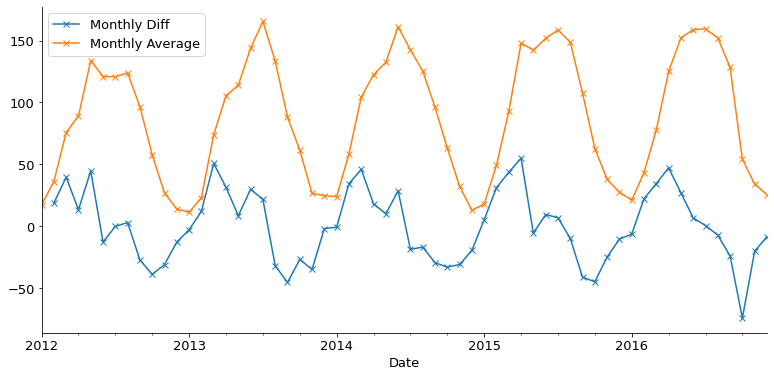

In [58]:
# monthly change
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend();

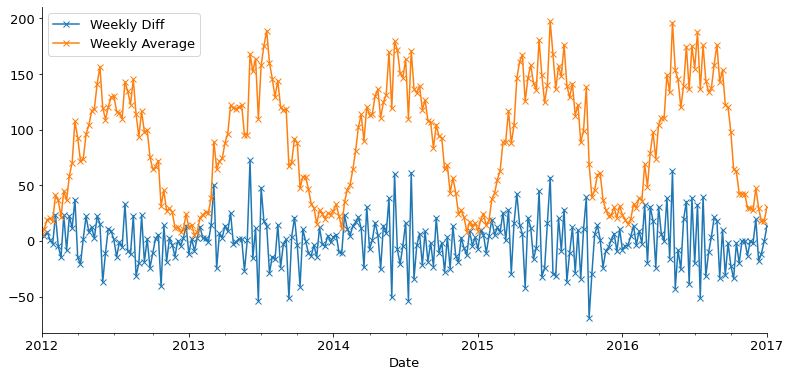

In [59]:
# weekly change in temperature
ax = s.resample('W').mean().diff().plot(label='Weekly Diff', marker='x')
s.resample('W').mean().plot(ax=ax, label='Weekly Average', marker='x')
plt.legend();

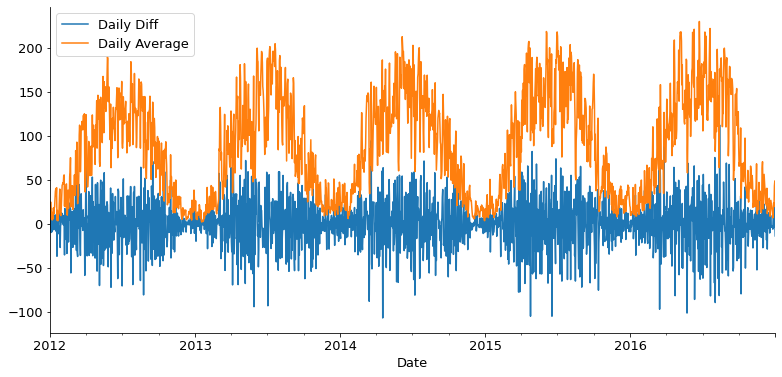

In [60]:
# daily change in temperature
ax = s.diff().plot(label='Daily Diff')
s.plot(ax=ax, label='Daily Average')
plt.legend();

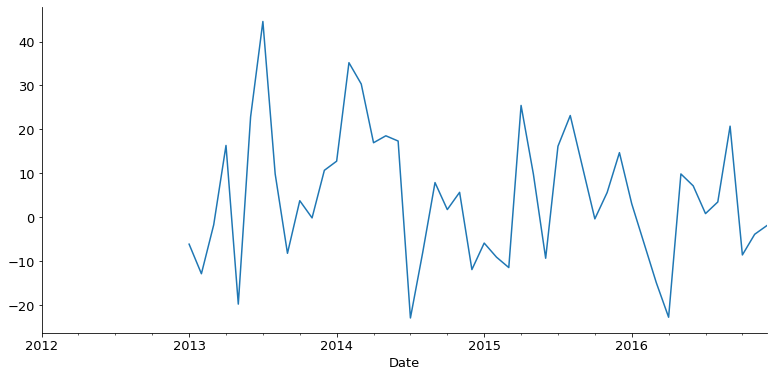

In [61]:
# difference in average daily sales for month and month from previous year
s.resample('M').mean().diff(12).plot();

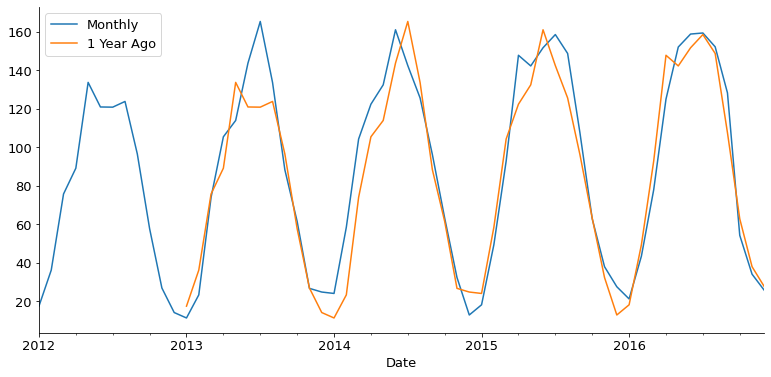

In [62]:
# use shift to overlay daily sales average for same month previous year
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend();

#### Seasonality

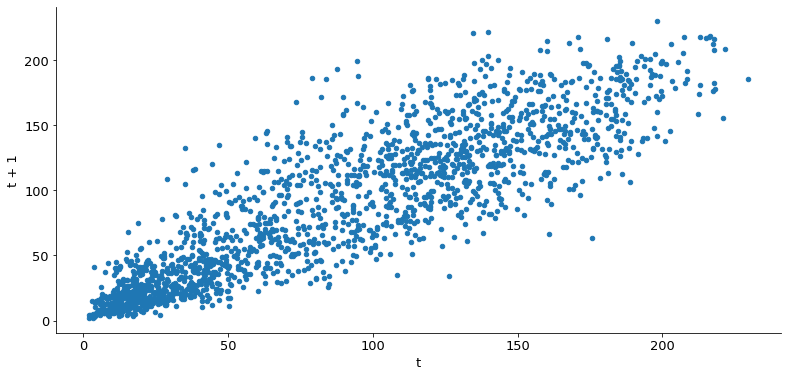

In [63]:
# lag plot

# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t');

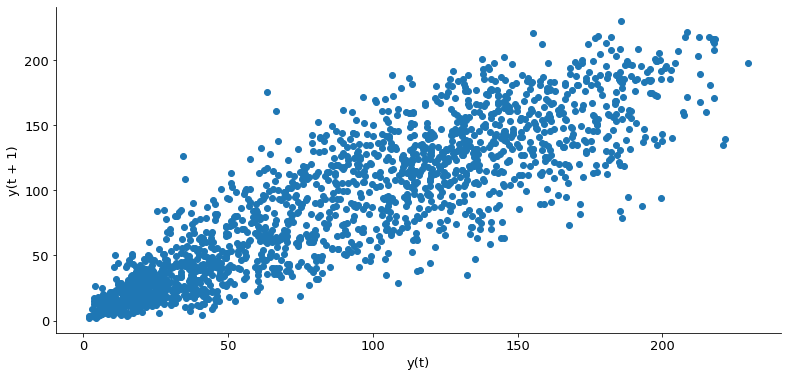

In [64]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

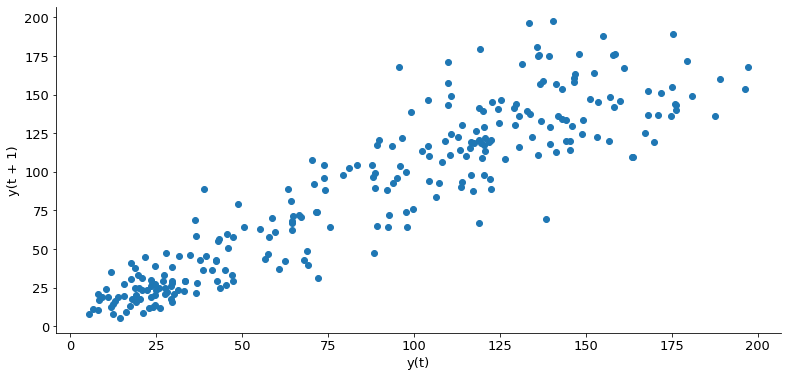

In [65]:
pd.plotting.lag_plot(s.resample('W').mean(), 1);

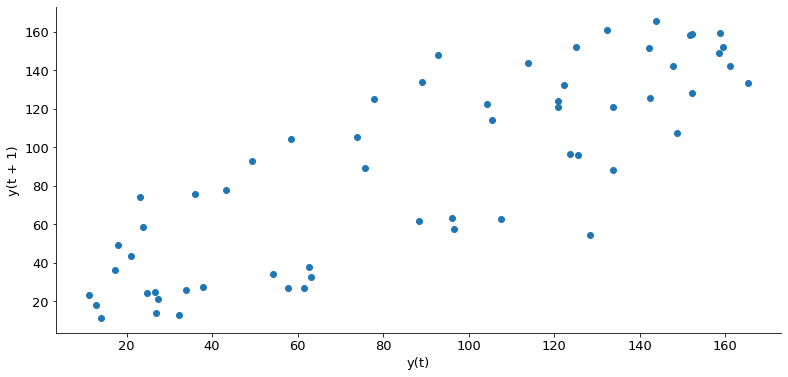

In [66]:
pd.plotting.lag_plot(s.resample('M').mean(), 1);

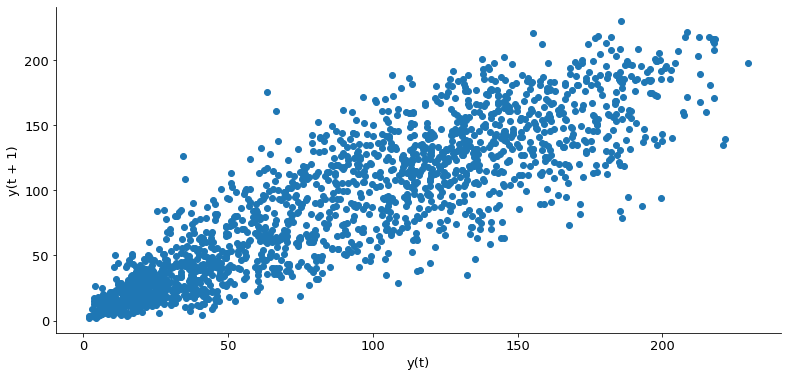

In [67]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s, 1);

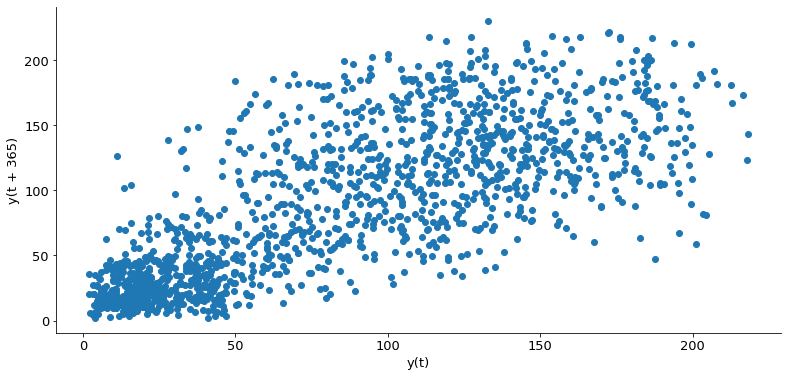

In [68]:
pd.plotting.lag_plot(s, 365);

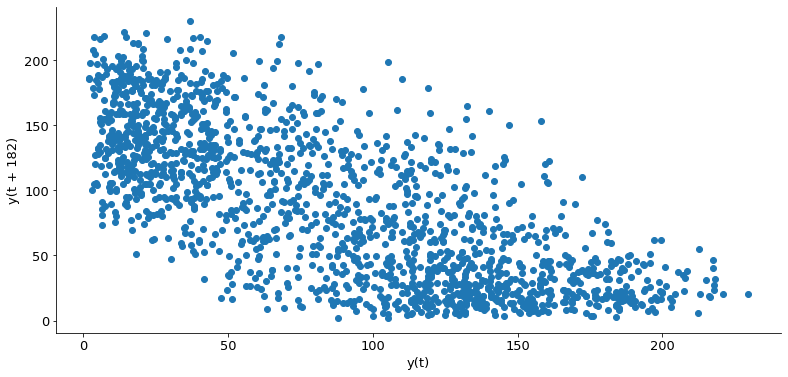

In [69]:
pd.plotting.lag_plot(s, round(365/2));

In [70]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [71]:
autocorrelation(s, 1)

0.8792231976656176

In [72]:
autocorrelation(s.resample('W').mean(), 1)

0.9118531136968879

In [73]:
autocorrelation(s.resample('M').mean(), 1)

0.8354118039064311

In [74]:
autocorr = pd.Series({lag: autocorrelation(s, lag) for lag in range(1, 365)})

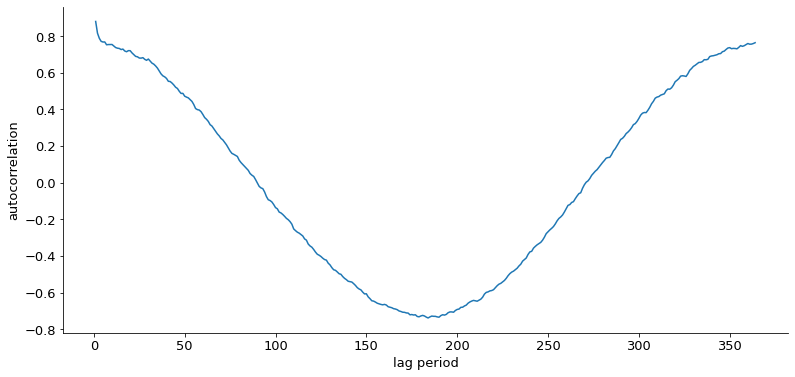

In [75]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation');

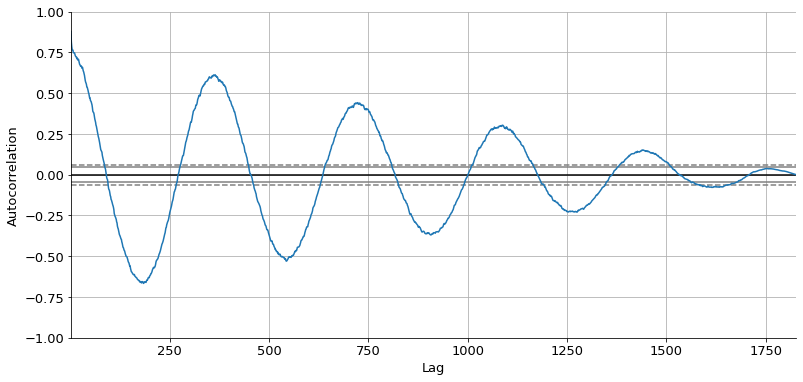

In [76]:
pd.plotting.autocorrelation_plot(s);

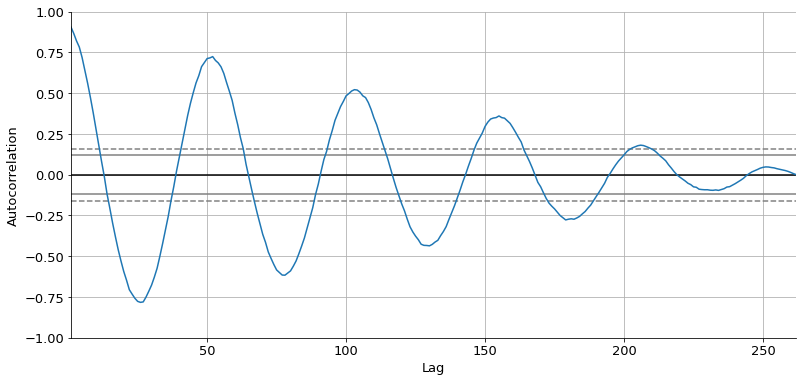

In [77]:
pd.plotting.autocorrelation_plot(s.resample('W').mean());

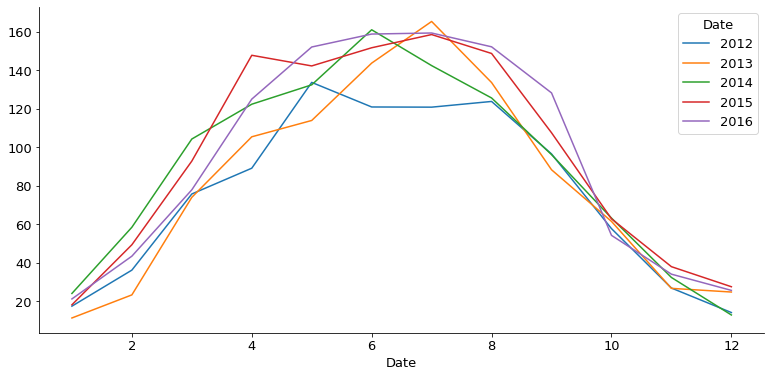

In [78]:
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot();

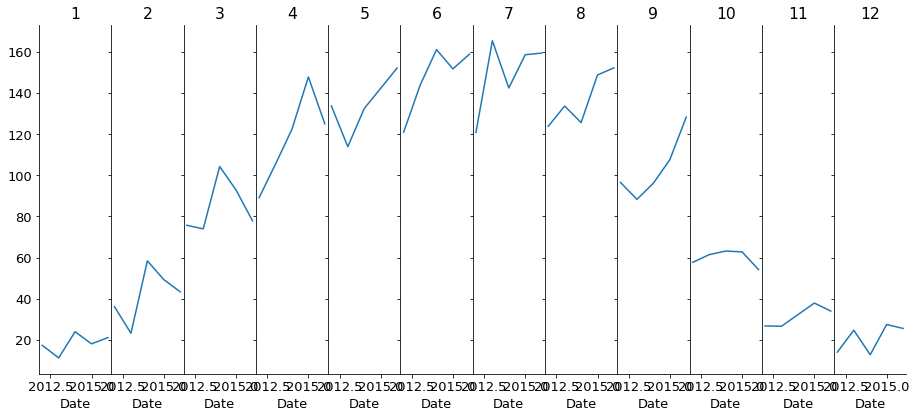

In [79]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

#### Seasonal Decomposition

In [80]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s.resample('W').mean(), model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

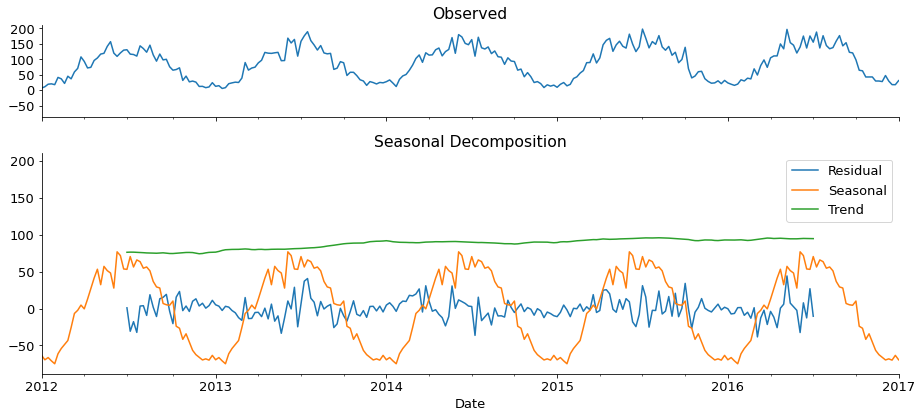

In [81]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();

In [82]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s, model='additive')
result = pd.DataFrame(dict(
    Observed=result.observed,
    Residual=result.resid,
    Seasonal=result.seasonal,
    Trend=result.trend
))

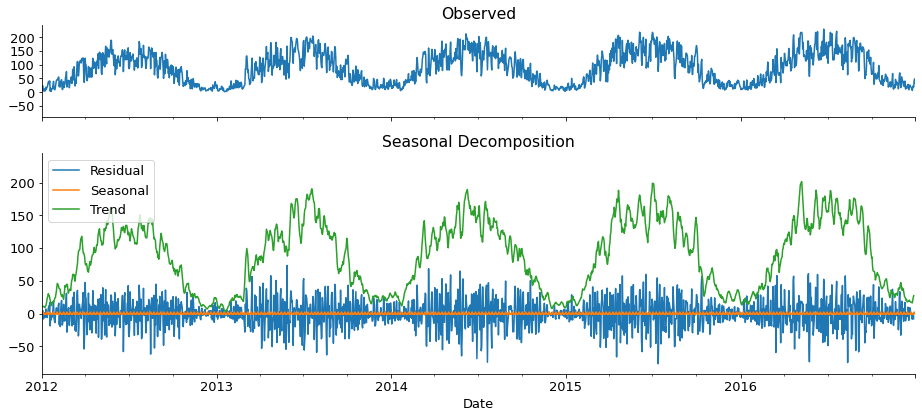

In [83]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='Seasonal Decomposition')
result.Observed.plot(ax=ax2, title='Observed')
fig.tight_layout();

## Extra Practice

**What is going on with the autocorrelation plots?**

In [84]:
# read in data
df = p.get_clean_sales_data()

In [85]:
store_1_sales = df.sales_total[df.store_id == 1]
store_2_sales = df.sales_total[df.store_id == 2]
store_3_sales = df.sales_total[df.store_id == 3]
store_4_sales = df.sales_total[df.store_id == 4]
store_5_sales = df.sales_total[df.store_id == 5]
store_6_sales = df.sales_total[df.store_id == 6]
store_7_sales = df.sales_total[df.store_id == 7]
store_8_sales = df.sales_total[df.store_id == 8]
store_9_sales = df.sales_total[df.store_id == 9]
store_10_sales = df.sales_total[df.store_id == 10]

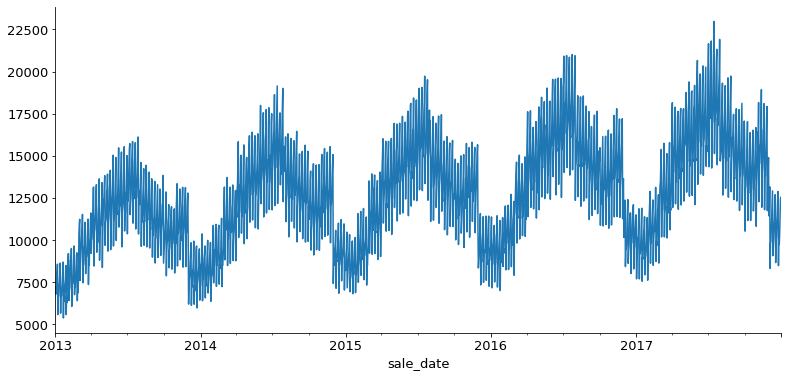

In [86]:
store_1_sales.resample('D').sum().plot();

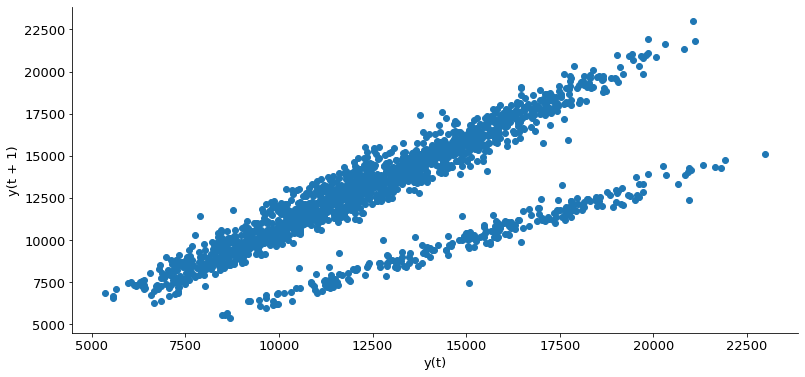

In [87]:
pd.plotting.lag_plot(store_1_sales.resample('D').sum(), 1);

In [88]:
# create a list of all sales data from each store
store_list = []
for i in range(1, 11):
    s = df.sales_total[df.store_id == i]
    store_list.append(s)

In [89]:
len(store_list)

10

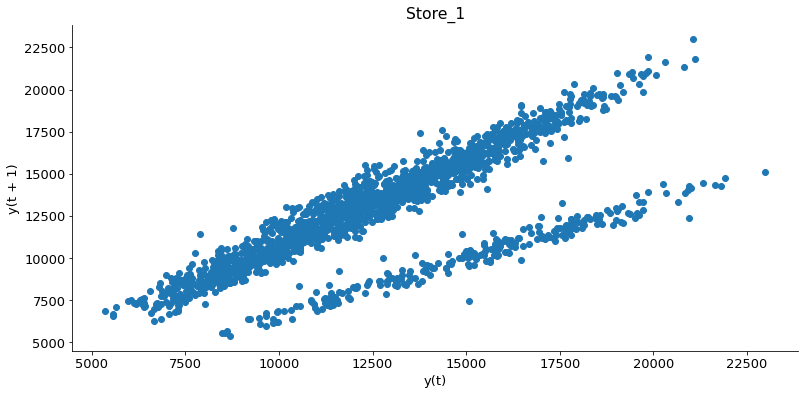

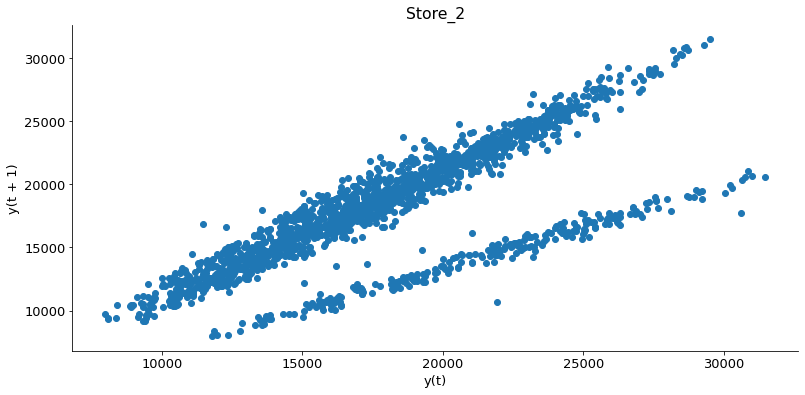

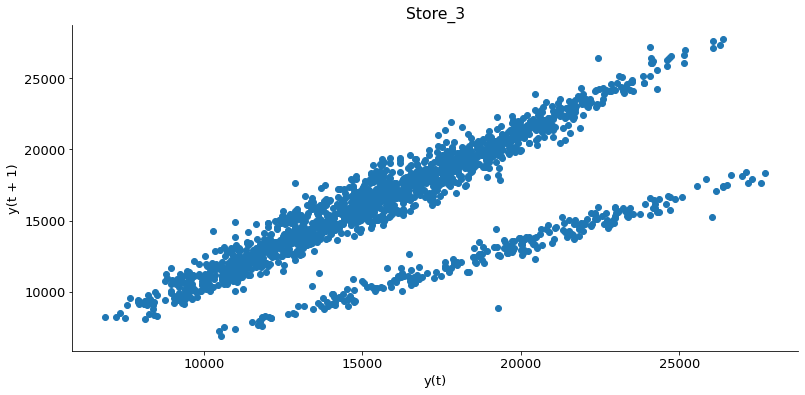

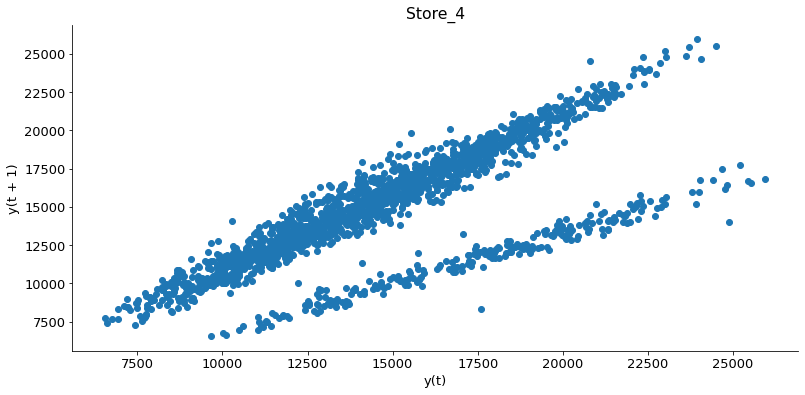

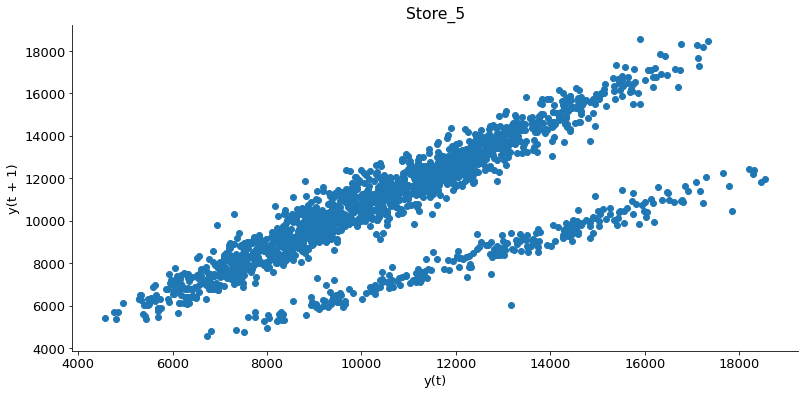

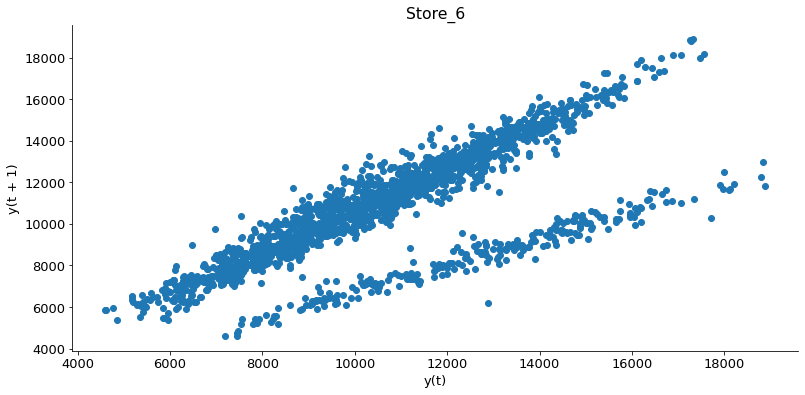

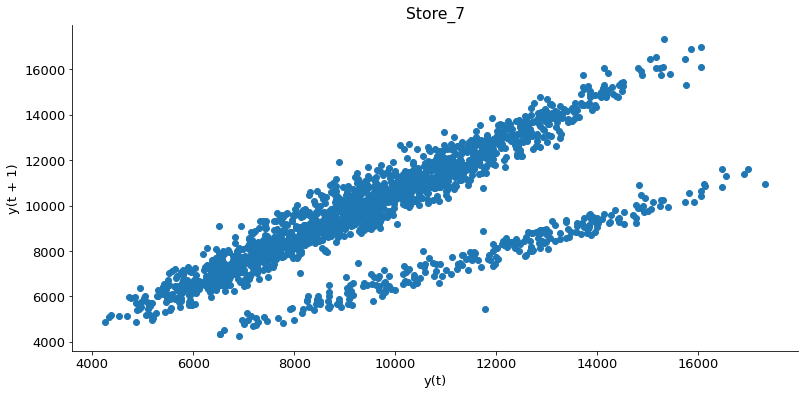

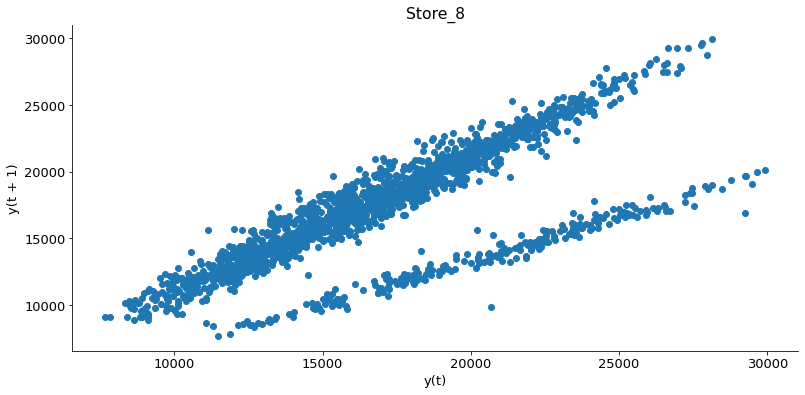

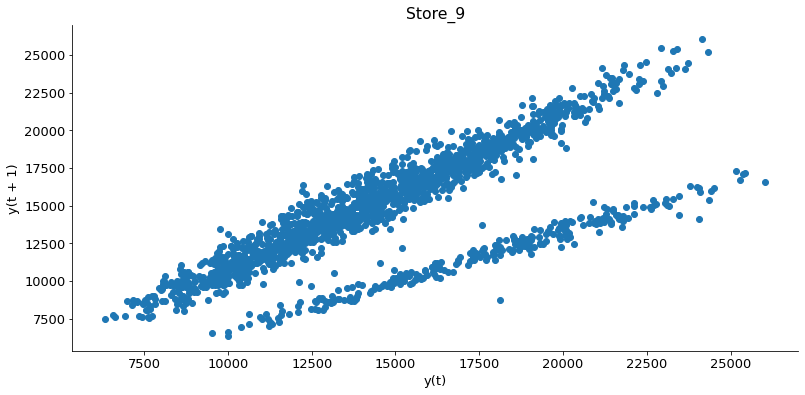

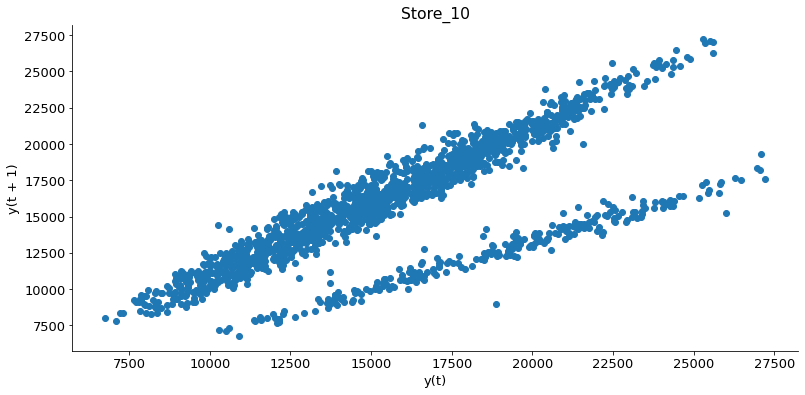

In [90]:
for i, store in enumerate(store_list):
    pd.plotting.lag_plot(store.resample('D').sum(), 1)
    plt.title(f'Store_{i+1}')
    plt.show()